In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as spy
from scipy import linalg
import pylab as py 

In [9]:
def normalize(M):
    """
    Subfunction for T. It normalizes the matrix given as input.
    
    INPUT:
        - M = A matrix M.
        
    OUTPUT:
        - M0 = The matrix M normalized, with rows that add to 1.     
    """
    
    M0=np.array(M)
    if M0.ndim == 1:
        s= M0.sum()
        return np.divide(M0,s)
        
    elif M0.ndim == 2:
        s=M0.sum(axis=1)
        return np.divide(M0,s[:,np.newaxis])
    else:
        return "Normalize. Wrong input"

In [106]:
def make_data_mean_free(X):
    """
    
    """
    
    n_col = len(X[0])

    for j in range(n_col):
        med=((X[:,j]).sum())/(len(X[:,j]))
        X[:,j] -= med
    return X

In [107]:
def TICA(X,lag):
    """
    Time-lagged/ time-structure-based independent component analysis.
    
    INPUT:
        - X = As input, we consider a d-dimensional vector, called r(t)=(ri(t))i=1,...,D. 
        Here, t is an integer from {1...N} denoting the time step. That is, we have a N x D matrix.
        
    OUTPUT:
        - 
    """
    
    X_ = np.copy(X)
    X_ = make_data_mean_free(X)
    
    T=len(X)
    D=len(X[0])
    
    X_0 = X_[[i for i in range(T-lag)],:]
    X_lag = X_[[lag+i for i in range(T-lag)],:]
    
    #Covariance matrices
    C_0 = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_0))
    C_lag = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_lag))
    
    #Symmetrized time-lagged covariance matrix
    C_lag = 1/2 * (C_lag + np.transpose(C_lag))
    
    #Eigenvalue problem --> C_lag * U = eig_val * C_0 * U]
    U = spy.linalg.eig(C_lag,C_0)[1]
    
    #Projection onto the TICA space
    Z = np.dot(X_,U)
    
    return Z

In [109]:
Xa=np.random.rand(6,10)

print(Xa)
print(len(Xa))

[[ 0.6772159   0.98130219  0.00349713  0.88984019  0.88954158  0.34802185
   0.9381734   0.38045121  0.22426094  0.32798543]
 [ 0.2603218   0.06665483  0.77978405  0.59786782  0.60442293  0.57068969
   0.73029636  0.29924903  0.96294572  0.97395958]
 [ 0.7410249   0.01045686  0.96575421  0.26705373  0.80714926  0.0716186
   0.20585265  0.61021717  0.84040145  0.7258573 ]
 [ 0.61945151  0.36794891  0.51617185  0.3726646   0.50935792  0.86691775
   0.30951835  0.6973583   0.05309299  0.73370254]
 [ 0.81399383  0.35668375  0.76483538  0.55058851  0.51149717  0.79372957
   0.07372655  0.47441781  0.42513417  0.88382102]
 [ 0.55164776  0.28919028  0.974936    0.27987318  0.29376271  0.36529304
   0.27430248  0.17771141  0.96272968  0.01963894]]
6


In [115]:
TICA(Xa,2)

C:\Users\PabloAgustin\Miniconda3\lib\site-packages\scipy\linalg\decomp.py:60: RuntimeWarning: divide by zero encountered in true_divide
  w = (alphar + _I * alphai) / beta
C:\Users\PabloAgustin\Miniconda3\lib\site-packages\scipy\linalg\decomp.py:60: RuntimeWarning: invalid value encountered in true_divide
  w = (alphar + _I * alphai) / beta
C:\Users\PabloAgustin\Miniconda3\lib\site-packages\scipy\linalg\decomp.py:39: RuntimeWarning: invalid value encountered in greater
  m = (w.imag > 0)
C:\Users\PabloAgustin\Miniconda3\lib\site-packages\scipy\linalg\decomp.py:40: RuntimeWarning: invalid value encountered in less
  m[:-1] |= (w.imag[1:] < 0)  # workaround for LAPACK bug, cf. ticket #709


array([[ -5.66186843e-17+0.j,   1.65152458e-02+0.j,  -2.01712558e-17+0.j,
          5.48127063e-17+0.j,  -1.04938959e-16+0.j,   5.23317715e-17+0.j,
         -1.59516963e-16+0.j,   1.12241192e-16+0.j,   2.43439798e-16+0.j,
         -1.13657584e-01+0.j],
       [  3.64708150e-18+0.j,  -8.68544879e-02+0.j,   6.34925367e-17+0.j,
          2.84595521e-17+0.j,   7.03926377e-17+0.j,   3.81934901e-17+0.j,
          3.62363291e-16+0.j,   1.73730652e-16+0.j,  -1.54271090e-16+0.j,
          1.55852583e-01+0.j],
       [ -8.09289512e-17+0.j,   2.63010924e-17+0.j,  -4.65721713e-02+0.j,
         -8.49039664e-16+0.j,   3.67629156e-16+0.j,  -1.02499181e-16+0.j,
          2.27212526e-17+0.j,  -1.70370569e-16+0.j,  -1.98277985e-17+0.j,
         -1.00721397e-17+0.j],
       [  6.88092430e-17+0.j,   3.11109702e-18+0.j,  -4.65721713e-02+0.j,
          8.58073786e-16+0.j,   2.73607876e-16+0.j,  -8.07582913e-17+0.j,
         -2.99363098e-17+0.j,   3.32306714e-17+0.j,   3.83929640e-17+0.j,
          2.7405095

[None, None]

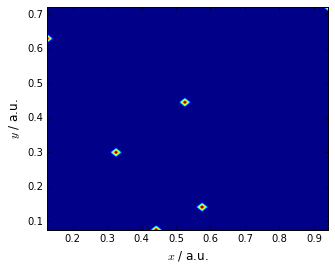

In [57]:
h, xedges, yedges = np.histogram2d(Xa[:, 0], Xa[:, 1], bins=(50, 50))
xcenters = xedges[:-1] + 0.5 * (xedges[1:] - xedges[:-1])
ycenters = yedges[:-1] + 0.5 * (yedges[1:] - yedges[:-1])
x, y = np.meshgrid(xcenters, ycenters, indexing='ij')
fig, ax = plt.subplots()
ax.contourf(x, y, h, np.linspace(h.min(), h.max(), 60))
ax.set_xlabel(r"$x$ / a.u.", fontsize=12)
ax.set_ylabel(r"$y$ / a.u.", fontsize=12)
ax.set(aspect='equal', adjustable='box-forced')

In [6]:
a=np.matrix([[1,1],[2,3],[3,4]])
b=np.transpose(a)
np.dot(b,a)

matrix([[14, 19],
        [19, 26]])

In [18]:
T=len(Xa)
D=len(Xa[0])

lag=5

X_0 = Xa[[i for i in range(T-lag)],:]
X_lag = Xa[[lag+i for i in range(T-lag)],:]

C_0 = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_0))
C_lag = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_lag))

print(C_0.size)
print(C_lag.size)

(spy.linalg.eig(C_0,C_lag)[1]).size

400
400


400

In [ ]:
py.plot(Xa,[i for i in range(len(Xa))],'o',linestyle='--')
py.show()